# Randomization Inference

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import random
import statsmodels.formula.api as smf
import statsmodels.api as sm
import math
import warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_stata("https://github.com/worldbank/r-econ-visual-library/raw/master/Library/Data/evaluation.dta")

analysis_data = data[(data.eligible == 1) & (data["round"] == 1)]
num_cluster = len(set(analysis_data.locality_identifier))
num_treated_cluster = len(set(analysis_data[analysis_data.treatment_locality == 1].locality_identifier))
num_cluster, num_treated_cluster

(197, 98)

Text(0.5, 0, 'Simulated point estimates \n(N = 1000)')

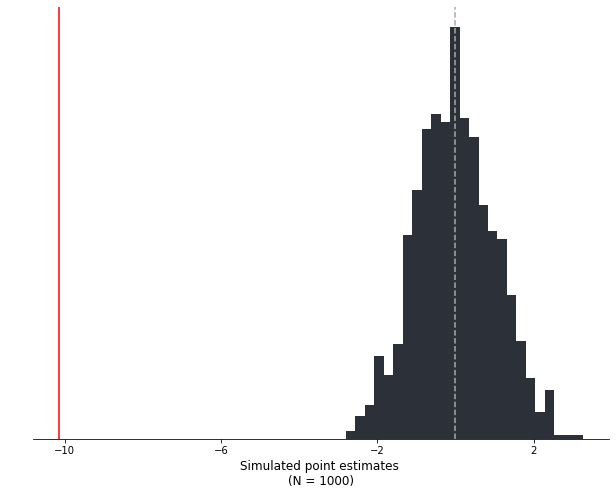

In [16]:
random.seed(19)
num_sim = 1000
sim_est = []

sim_data = analysis_data

for i in range(num_sim):
    
    treated_locality_sim = random.sample(set(analysis_data.locality_identifier), num_treated_cluster)
    
    treat_sim = np.where(np.isin(np.array(analysis_data.locality_identifier), treated_locality_sim), 1, 0)
    
    sim_data['treat_sim'] = treat_sim
    res = smf.ols("health_expenditures ~ treat_sim", data = sim_data).fit()
    # print(res.params)
    sim_est.append(res.params[1])

res = smf.ols("health_expenditures ~ treatment_locality", data = analysis_data).fit()
point_est = res.params[1]


bins = len(np.arange(min(sim_est), max(sim_est),  .25))
mean_res = np.mean(sim_est)

## Plot elements
fig = plt.figure(facecolor = 'white', figsize=(8, 6))
ax = fig.add_axes([.1, 1, 1, 1])
# Histogram
ax.hist(sim_est, bins = bins, color="#2c3038")
# coef TReatment)locality, main data
ax.axvline(point_est, color = "red")
# mean simmulated coef
ax.axvline(mean_res, color = "#aaa", linestyle = "--")
# Border
omit = ['top', 'right', 'left']
# aesthetics
ax.spines[omit].set_visible(False)
ax.set_xticks(np.arange(int(point_est - .1), max(sim_est), 4))
ax.tick_params('y', colors = 'white')
ax.set_xlabel(f"Simulated point estimates \n(N = {num_sim})", size = 12)